In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.50'

In [3]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

In [4]:
filetype='headless_txt' # Specifies raman file format, here a text file with no header
file_ext='.txt' # File extension, a txt file
prefix=False # File doesn't have a 01, 02 prefix, as WItec can add
exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Spectrum'] # Exclude files with these strings in
Diad_Files=pf.get_files(path=spectra_path, file_ext=file_ext, 
            exclude_str=exclude_str)
print(Diad_Files)

['Cap19-05X1.txt', 'Cap19-05X2.txt', 'Cap19-06X1.txt', 'Cap19-06X2.txt', 'Cap19-07X1.txt', 'Cap19-07X2.txt', 'Cap19-08X1.txt', 'Cap19-08X2.txt', 'Cap19-12X1.txt', 'Cap19-12X2.txt', 'Cap19-17X1.txt', 'Cap19-17X2.txt', 'Cap19-18X1.txt', 'Cap19-18X2.txt', 'FG04_31_MI.txt', 'FG04_31_MI3 (1).txt', 'FG04_31_MI3.txt', 'FG04_31_MI4 (1).txt', 'FG04_31_MI4.txt', 'POC1.txt', 'POC10.txt', 'POC11.txt', 'POC12.txt', 'POC13.txt', 'POC14.txt', 'POC15.txt', 'POC16.txt', 'POC17.txt', 'POC18.txt', 'POC19.txt', 'POC2.txt', 'POC20.txt', 'POC21.txt', 'POC22.txt', 'POC23.txt', 'POC24.txt', 'POC25.txt', 'POC26.txt', 'POC27.txt', 'POC28.txt', 'POC29.txt', 'POC3.txt', 'POC30.txt', 'POC31.txt', 'POC32.txt', 'POC33.txt', 'POC34.txt', 'POC35.txt', 'POC36.txt', 'POC37.txt', 'POC38.txt', 'POC39.txt', 'POC4.txt', 'POC40.txt', 'POC41.txt', 'POC42.txt', 'POC43.txt', 'POC44.txt', 'POC45.txt', 'POC46.txt', 'POC47.txt', 'POC48.txt', 'POC49.txt', 'POC5.txt', 'POC50 (Sub BG).txt', 'POC50.txt', 'POC51 (Sub BG).txt', 'POC51.t

In [5]:
file_weak=pf.get_data(path=spectra_path,
    filename='Cap19-17X2.txt', filetype=filetype)

In [5]:
file_strong=pf.get_data(path=spectra_path,
    filename='POC21.txt', filetype=filetype)

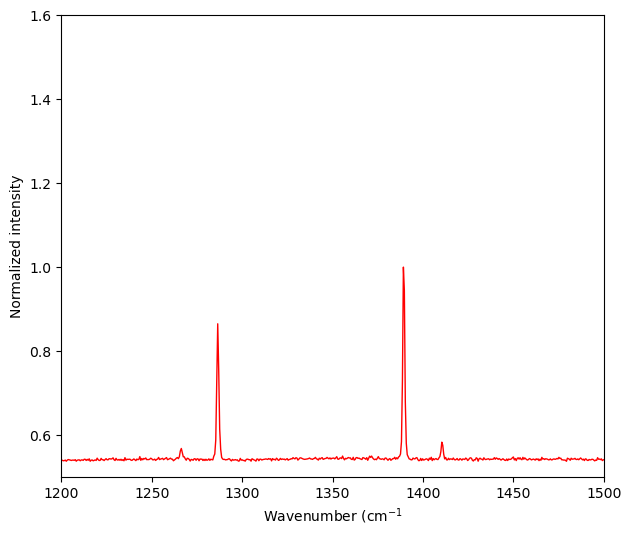

In [29]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,6))
ax1.plot(file_weak[:, 0], 
         file_weak[:, 1]/(np.max(file_weak[:, 1])), '-r', lw=1)
# ax1.plot(file_strong[:, 0], 
#          file_strong[:, 1]/(np.max(file_strong[:, 1]))+0.5, '-b', lw=1)
ax1.set_xlim([1200, 1500])
ax1.set_ylim([0.5, 1.6])
ax1.set_ylabel('Normalized intensity')
ax1.set_xlabel('Wavenumber (cm$^{-1}$')
fig.savefig('diadoffset1.png', dpi=200)

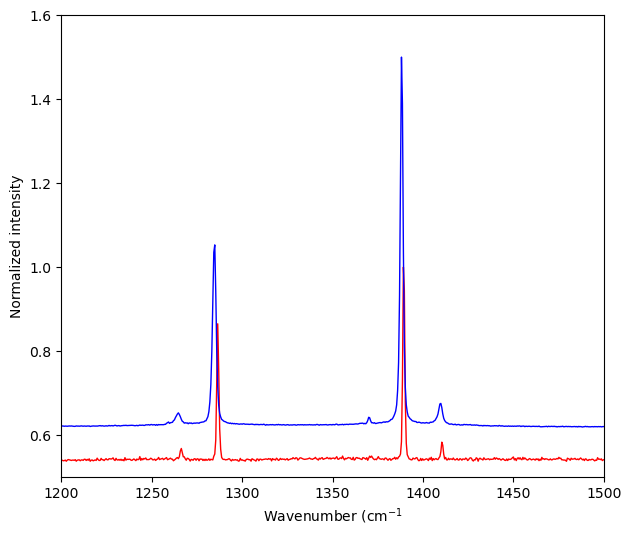

In [30]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,6))
ax1.plot(file_weak[:, 0], 
         file_weak[:, 1]/(np.max(file_weak[:, 1])), '-r', lw=1)
ax1.plot(file_strong[:, 0], 
         file_strong[:, 1]/(np.max(file_strong[:, 1]))+0.5, '-b', lw=1)
ax1.set_xlim([1200, 1500])
ax1.set_ylim([0.5, 1.6])
ax1.set_ylabel('Normalized intensity')
ax1.set_xlabel('Wavenumber (cm$^{-1}$')
fig.savefig('diadoffset2.png', dpi=200)